# Assignment 4 - Streams, Graphs and Neural Networks

##### <font color='#e52425'>Please fill out your name and StudentID here:</font>

##### Student Name: Md Majharul Islam Nayem

##### Student ID: stu218568

##### The Tutorial will take place online on Friday, Feb 5th 2021 at 11:00am (CET) c.t. <br><br>This Assignment is due on Monday, Feb 14th 2021 at 11:59pm (CET)<br><br>The oral exam will take place between Feb 22nd and 24th 2021!

| Total Points | Points Needed To Pass (50%) | Points Reached |
|:-:|:-:|:-----------:|
| 38 | 19 |  |

As in all assignments, we marked every part, where you have to add something with a <font color='#782769'> purple TODO</font>, the <font color='#e52425'>graded parts are marked in red</font> and are mandatory to submit to take part in the exam, so please read the assignment carefully!

The main idea to this assignment is learning and applying the concepts of streams, graphs and neural networks. 

## Part 1 - Stream Processing and Mining

As you already heard in the lecture, data streams need to be handled differently than batch data for a few reasons:
* We generally have a huge amount of data which might not fit onto one machine
* The data arrives at a fast rate, so we do not have much processing time
* Patterns in the data might change over time so the algorithm needs to be adaptive and report on changes

With all these things in mind, stream processing and mining algorithms tend to be a little more complex than their batch counterpart. In this first part we want to show you one example of a Hoeffding Tree, adapted for Stream processing.
A Hoeffding Tree is typically used for classification and desicion making and uses the concept of entropy and information gain to split the data and make desicions based on the attribute that has been the most important and crutial in the past.

For simplicity reasons, we will not fully program the entire tree but rather do some calculations by hand (or by machine) and simulate a stream by iteratively adding more data in the dataset. 

The first 8 samples of our "stream" are labeled by hand and we want to find out if we can already make a decision with as few samples as possible.

A Hoeffding Tree (HT) adapted for streams uses an error value to calculate if the information we have to make a decision is sufficient or not. This error value is calculated as

$$
\epsilon = \sqrt{\frac{R^2*ln(\frac{1}{\delta})}{2n}} 
$$

where $R$ is the range of our random variable (in our case it is 1), $\delta$ is the confidence, a parameter set by the user to indicate how "sure" you want your tree to be before making a decision and $n$ is the number of observations made so far.

We need another parameter $N_{min}$ to specify how many samples are stored and used for every iteration. So, if we set $N_{min} = 2$, we will start with two samples, calculate the values and if we are not confident with our decision wait for another 2 samples, then recalculate everything with the 4 samples we have seen so far, check for confidence and so on... We define, that a confident decision can only be made, if the highest Information Gain minus the second highest Information Gain is equal or larger (!) than the calculated error value.

The dataset we are gonna use are exam results for a computer science lecture (purely fictional results, of course ;P ). We have collected data on how many hours a student has spend on preparation (time: {<4, 4-12, >12} ), how much prior knowledge this student had before attending the lecture (knowledge: {low, high} ) and if he attended the tutorials (tutorial: {yes, no} ). Based on these three attributes, we want to classify if the student passed or failed the exam ( result: {passed, failed} ). The data, we collected looks like this:

| sample | Time | Knowledge | Tutorial | Result |
|:-:|:-:|:-:|:-:|:-:|
| 1 | <4 | low | no | failed |
| 2 | 4-12 | low | yes | passed |
| 3 | >12 | high | yes | failed |
| 4 | <4 | high | yes | passed |
| 5 | >12 | low | yes | passed |
| 6 | <4 | low | yes | passed |
| 7 | 4-12 | high | no | failed |
| 8 | 4-12 | low | no | failed |

In [75]:
data = [
    ["<4", "low", "no", "failed"],
    ["4-12", "low", "yes", "passed"],
    [">12", "high", "yes", "failed"],
    ["<4", "high", "yes", "passed"],
    [">12", "low", "yes", "passed"],
    ["<4", "low", "yes", "passed"],
    ["4-12", "high", "no", "failed"],
    ["4-12", "low", "no", "failed"]
]

### <font color='#782769'>Now it's your turn!<br> TODO #1:</font>
### <font color='#e52425'>This will be graded. (3 points)</font>

Iteratively construct the described HT with $\delta = 0.2$ and $N_{min}=2$! Below, you can find a script to calculate the values you need to use for each iteration. First, complete the function used to calculate the entropy, then calculate Information Gain for each attribute and compare the above mentioned condition for decision making to the error value. If $IG_{max} - IG_{2ndMax} \geq \epsilon_n $ you can stop your calculation and use the attribut with $IG_{max}$ as the first deciding element in the tree. 

#### You may programm the calculations or you can do them on paper by hand (as shown in the tutorial), you decide! 
#### Afterwards, answer the questions down below, you do not need to give us your calculations if you did them on paper!

In [76]:
import numpy as np

delta = 0.2
n_min = 2
R = 1
epsilon = 0
i=0

def get_entropy(ratio_list):
    ## TODO#1: Complete the function to calculate the entropy.
    #  Use np.log2() and the formular from the tutorials or the
    #  lecture notes
    
    entropy = 0
    for ratio in ratio_list:
        ratio = ratio / sum(ratio_list)
        entropy += - ratio * np.log2(ratio)
        
    return entropy

while i < 4:
    
    dataset = data[:n_min]
    
    num_pass = 0
    num_fail = 0
    for row in dataset:
        num_pass += row.count('passed')
        num_fail += row.count('failed')
    
    entropy_D = get_entropy([num_pass,num_fail])
    
    epsilon = np.sqrt( (R*R*np.log(1/delta)) / (2*n_min) )
    
    print("You are using",n_min, "samples of your data.")
    print("Entropy D_",n_min, " is ", entropy_D)
    print("The error value epsilon is", epsilon)
    print("--------")
    
    n_min += 2
    i += 1
    

You are using 2 samples of your data.
Entropy D_ 2  is  1.0
The error value epsilon is 0.6343181205897598
--------
You are using 4 samples of your data.
Entropy D_ 4  is  1.0
The error value epsilon is 0.44853064449852537
--------
You are using 6 samples of your data.
Entropy D_ 6  is  0.9182958340544896
The error value epsilon is 0.36622373767435534
--------
You are using 8 samples of your data.
Entropy D_ 8  is  1.0
The error value epsilon is 0.3171590602948799
--------


### <font color='#782769'>Questions:</font>
##### You get a half point for each correct answer.

* How many samples do you need until you can make your first confident decision? Remember we are always adding two samples at a time.

6

* Which attribute will be used as the first split? And what is the decision made depending on the values of this attribute?

Tutorial
Information gain based on attibute value of Toutorial is greater than other attributes. 

* Which attribute in all iterations you had to do has the lowest non-zero (!) Information Gain?

Knowledge

* If you now got new samples arriving at the stream, looking like this:

|sample | Time | Knowledge | Tutorial | Result |
|:-:|:-:|:-:|:-:|:-:|
|9| <4 | high | no | ??? |
|10| 4-12 | high | yes | ??? |

* Would you be able to decide if the students failed or passed with your current decision tree (without updating right away)?
* If yes, what would the decision be and if no, what would you have to do next?

Yes.

My prediction is

|9|-- failed.

|10|-- passed.

## Part 2 - Graphs

Imagine you are part of a research group. Since it is crucial to know the state of the art literature and authors of a research field you need to identify the most active authors and communities. In order to mine these and further information, you got a graph dataset representing all authors and their publications.

For handling and analyzing graph data the library networkx ("nx") provides you a collection of the most essential features. This one as well as some other libraries need to be installed and imported first.

In [79]:
%pip install networkx
%pip install plotly
%matplotlib inline
import matplotlib.pyplot as plt
import networkx as nx
from networkx.algorithms import community
from networkx.algorithms.community.quality import modularity
import plotly.graph_objects as go
import numpy as np

You should consider upgrading via the '/usr/local/opt/python@3.8/bin/python3.8 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.
You should consider upgrading via the '/usr/local/opt/python@3.8/bin/python3.8 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


Next we load the dblp graph dataset ( https://snap.stanford.edu/data/com-DBLP.html ) with the help of the nx library and visualize it with library plotly.

In [80]:
# Load the dataset
root_path = "./dblp_dataset"
dblp = nx.read_edgelist(f"{root_path}/dblp_graph")
dblp

#### Key characteristics of the dataset
Before we begin with the analysis of the dataset, we first inspect the key characteristics of the dataset to get a first overview of the size and structure of the dataset.

In [81]:
n_nodes = dblp.number_of_nodes() #TODO: get the number of nodes in the nx graph
n_edges = dblp.number_of_edges() #TODO: get the number of edges in the nx graph
n_c = nx.algorithms.number_connected_components(dblp)
components = list(nx.connected_components(dblp))
sub_graphs = list(sorted((dblp.subgraph(c) for c in nx.connected_components(dblp)),key=len,reverse=True))

print(f"Nodes: {n_nodes}")
print(f"Edges: {n_edges}")
print(f"Components: {n_c}")

Nodes: 31377
Edges: 106296
Components: 1609


The dataset consists of $31377$ nodes, and $106296$ edges. Further is graph is not connected, i.e., the graph consists of $1609$ components.

The distribution of component sizs are shown in the following figure:

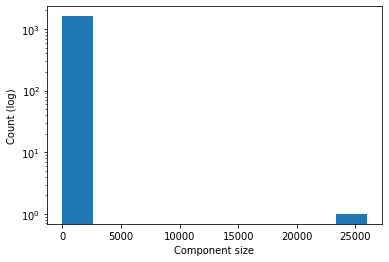

In [82]:
plt.xlabel("Component size")
plt.ylabel("Count (log)")
plt.hist([len(component) for component in components],log=True)
plt.show()

In [83]:
print(f"Size of largest component/subgraph: {len(sub_graphs[0])}")

Size of largest component/subgraph: 25949


The largest component/subgraph consists of $25949$ nodes.

#### Degree distribution
The degree distribution shows the distribution of all node degrees in the graph. Therefore, allows us to inspect how well connected the graph is.

For the given dataset the degree distribution look as follows:

Coefficient: -2.59698025588981


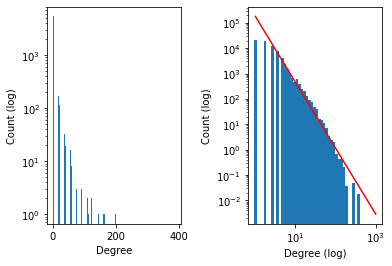

In [84]:
degrees = dict(dblp.degree()) #TODO: create a degrees dictionary containing the nodes as keys and node degrees as values
plt.subplot(121)
plt.subplots_adjust(wspace=0.5)
plt.ylabel("Count (log)")
plt.xlabel("Degree")
plt.hist(list(degrees.values()),bins="auto",log=True)
plt.subplot(122)
# log-scaled bins
bins = np.logspace(0, 3, 50)
widths = (bins[1:] - bins[:-1])

# Calculate histogram
hist = np.histogram(list(degrees.values()), bins=bins)

# normalize by bin width
hist_norm = hist[0]/widths

xlog = [np.log10(h) for h in hist_norm if h > 0]
ylog = [np.log10(b) for i, b in enumerate(bins) if i < len(hist_norm)
and hist_norm[i] > 0]

from sklearn.linear_model import LinearRegression

xloga = np.array(ylog).reshape(-1, 1)
yloga = np.array(xlog)

model = LinearRegression().fit(xloga, yloga)

print(f"Coefficient: {model.coef_[0]}")

# log10(y) = coef * log10(x) + intercept
#       y  = 10^(coef*log10(x)) * 
ny = [10**(model.coef_ * np.log10(b) + model.intercept_) for b in bins]

# plot it
plt.bar(bins[:-1], hist_norm, widths)
plt.plot(bins, ny, color="red")
plt.xscale('log')
plt.xlabel("Degree (log)")
plt.yscale('log')
plt.ylabel("Count (log)")
plt.show()

The figure shows that most authors have collaborated only with a small amount of other authors. Only a few authors have collaborated with a large amount of other authors. Further it seems that the distribution roughly follow the powerlaw with parameter $\approx -2.6$.


#### Diameters of the Graph
The diameter of a graph is defined as the length of the longest shortest path in the graph. Since there are multiple components in the graph, each with its own diameter, the diameter the graph is the maximum value of all component diameters. Thus the diameter of the graph is calculated as follows (Note: We excluded the largest connected component with its $\approx 2600$ nodes from the calculation of the diameter due to restricted computation power):

In [85]:
diameters = [nx.diameter(sub_graph) for sub_graph in sub_graphs[1:]]
max_diameter = max(diameters)
print(f"Diameter: {max_diameter}")

Diameter: 6


This calculation shows that the diameter of the graph is at least 6, i.e., the length of the longest shortest path across all components is 6.

#### Clustering coefficient
The clustering coefficient of a graph is a measurement of the probability that of two neighbouring nodes are also being connected with each other.

For the calculation of the clustering coefficient the graph, we report the average clustering coffecient of all nodes of our graph based on the following calculation:

In [86]:
nx.algorithms.cluster.average_clustering(dblp)

0.7146650756233709

The average clustering coeffcient of the graph is $\approx 0.714$.

### <font color='#782769'>TODO #2:</font>
### <font color='#e52425'>This will be graded. (3 points)</font>

#### The top-5 authors based on PageRank 

To determine the top-5 authors in the graph based on PageRank, we have to
1. calculate the pagerank values of all nodes in the graph,
2. sort the pagerank values in descreasing order, and 
3. look up the authors corresponding to the first five node ids. 

As a result you need to get the following top-5 authors:
1. Jiawei Han (0.0011194371730701732)
2. Philip S. Yu (0.0010489023698363384)
3. Christos Faloutsos (0.0010288971741606984)
4. Jian Pei (0.0006356602231533573)
5. Gerhard Weikum (0.0005500372411407603)

In [87]:
# 0. Read the authors
authors = {}
for line in open(f"{root_path}/dblp_authors_ids","r"):
    split = line.split("\t",2)
    key = split[0]
    value = split[1].strip()
    authors[key] = value
    
# 1. Calculate the pagerank

pr = nx.pagerank(dblp) # TODO (1 point)

# 2. Sort by pagerank value 

sorted_pr = sorted(pr.items(), key=lambda x: x[1], reverse=True) # TODO (1 point)

# 3. Look up

for author_id, rank in sorted_pr[:5]: # TODO (1 point)
    print(f'{authors[author_id]} ({rank})' )


Jiawei Han (0.0011194371730701732)
Philip S. Yu (0.0010489023698363384)
Christos Faloutsos (0.0010288971741606984)
Jian Pei (0.0006356602231533573)
Gerhard Weikum (0.0005500372411407603)


#### Communities

For the attempt to find communities, we took a look at the second largest connected component in the graph, since the process did not terminate for the largest connected component in a feasible time.
We chose the girvan-newman method to find communities at different levels:

In [88]:
com_generator = community.girvan_newman(sub_graphs[1])
gn_communities = [c for c in com_generator]
for i in range(len(gn_communities)):
    # TODO: show the communities and their size
    # ...
    comn = gn_communities[i][i+1]
    
    print(f'Community at level {i} :')
    print(comn)
    print(f'size is {len(comn)}')
    print('\n')

Community at level 0 :
{'575963', '575949', '575945', '575943', '575955', '575956', '575944', '206806', '575953', '123276', '575952', '575950', '575948', '575964', '575962', '575942', '575947', '575954', '575946', '575960', '575957', '196681', '575958', '575961', '575959', '575951'}
size is 26


Community at level 1 :
{'575949', '575945', '575943', '575955', '575956', '575944', '206806', '575953', '123276', '575952', '575950', '575948', '575964', '575962', '575942', '575947', '575954', '575946', '575960', '575957', '196681', '575958', '575961', '575959', '575951'}
size is 25


Community at level 2 :
{'575945', '575943', '575955', '575956', '575944', '206806', '575953', '123276', '575952', '575950', '575948', '575964', '575962', '575942', '575947', '575954', '575946', '575960', '575957', '196681', '575958', '575961', '575959', '575951'}
size is 24


Community at level 3 :
{'575943', '575956', '575955', '575944', '206806', '575953', '123276', '575952', '575950', '575948', '575964', '5759

After finding the communities for the different levels we investigate the optimal split:

In [89]:
# Evaluate cluster quality and experiment with different splits.
for i, part in enumerate(gn_communities):
    Qs = modularity(sub_graphs[1], part)
    print('Modularity of split ' + str(i) + ': ' + str(Qs))

Modularity of split 0: -0.0027434842249656633
Modularity of split 1: -0.005381449825894367
Modularity of split 2: -0.007913896802785664
Modularity of split 3: -0.010340825155640006
Modularity of split 4: -0.012662234884457162
Modularity of split 5: -0.014878125989237137
Modularity of split 6: -0.01698849846997993
Modularity of split 7: -0.018993352326685656
Modularity of split 8: -0.020892687559354195
Modularity of split 9: -0.022686504167985663
Modularity of split 10: -0.024374802152579898
Modularity of split 11: -0.025957581513137058
Modularity of split 12: -0.02743484224965709
Modularity of split 13: -0.028806584362139915
Modularity of split 14: -0.030072807850585612
Modularity of split 15: -0.03123351271499421
Modularity of split 16: -0.032288698955365625
Modularity of split 17: -0.03323836657169989
Modularity of split 18: -0.03408251556399702
Modularity of split 19: -0.03482114593225703
Modularity of split 20: -0.035454257676479875
Modularity of split 21: -0.03598185079666559
Modu

The values that were output are very close to 0 (-0.0027 to -0.037), which leads to the conclusion that there is no structure present that is significantly different from a random graph in this connected component.
The best split in this case would be the first split (modularity Q = -0.0027), although not my a large margin.
Presumably there is more structure present in the main connected component, where one could perform more meaningful analysis.

## Part 3 - Neural Networks

Neural Networks are well known to achieve an outstanding performance on various data analytics tasks like classification, regression and much more. In Part 3 of our assignment we want perceptrons to learn the output of the following logical gates:

<img src="images/gates.jpg">

Therefore, we require the following libraries for the necessary implementations which we need to import first.

In [90]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random

from utils import util

<img src="images/SLPerceptron.jpg">

First we need to load the dictionary with the training data for the gates AND, OR and XOR. Each dataset contains 1000 samples available for training the classifier related to the expected gate output.

In [91]:
data = util.load_data()
data.keys()

dict_keys(['AND', 'OR', 'XOR'])

Start with training a classifier learning an AND gate by choosing the dataset of AND gate.

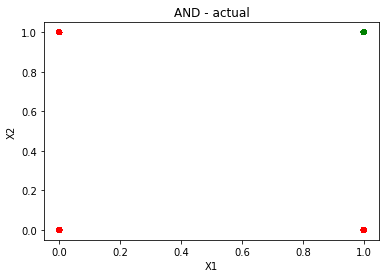

In [92]:
# START CELL FOR PERCEPTRON TRAINING

dataset = 'AND' # 'AND', 'OR', 'XOR'

X = data[dataset]['X']
Y = data[dataset]['Y']

input_layer_width = X.shape[1]
output_layer_width = Y.shape[1]

np.random.seed(1)
w = np.random.randn(input_layer_width + 1, output_layer_width)

util.plot_dataset(data, dataset)

Having a look to the visualization above of the labelled training data the learned classifier should be afterwards capable to separate red dots (Y=0) from green dots (Y=1).

### <font color='#782769'>TODO #3: Implement a Single Layer Perceptron with only numpy.</font>
### <font color='#e52425'>This will be graded. (7 points)</font>

Hint: During the implementation it is helpful to always check if the vectors have the dimensions you are expecting.

In [93]:
print(f'X: {X.shape}')
print(f'Y: {Y.shape}')
print(f'w: {w.shape}')

X: (1000, 2)
Y: (1000, 1)
w: (3, 1)


As you see instead of two parameters for the typical gate input (X1 and X2) the single layer perceptron requires an additional input parameter for the bias constant b=1.0 . Thats why the weight vector w has a length of 3 instead of 2.

Hint: Also play with the number of epochs and the learning rate lr in order to get a feeling of its impact to the training process and the resulting predictions.

In [94]:
def h(w, x):
    bias = w[0]
    z = np.sum(w[1:].T * x) + bias    
    return z

def activation_func(z):
    y = 1. if z > 0 else 0
    return y

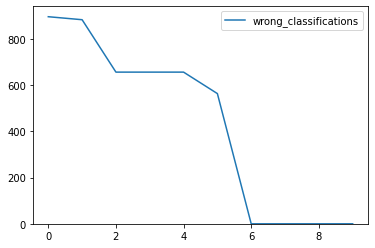

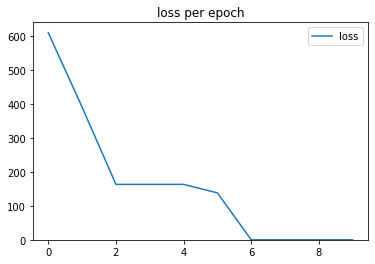

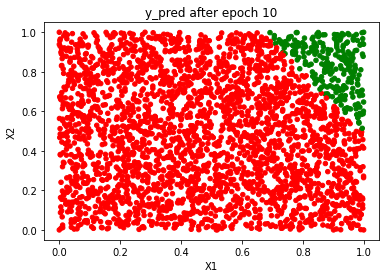

[0 0] -> 0
[0 1] -> 0
[1 0] -> 0
[1 1] -> 1.0


In [95]:
#TODO: check which effects the change of the learning rate has

lr=1e-03
epochs = 10
bias = 1.

losses = []
wrong_classifications=[]

for epoch in range(0,epochs):

    loss = 0.
    num_wrong_classifications = 0.
    
    for sample_idx in range(0, X.shape[0]):

        x = X[sample_idx, :]
        y = Y[sample_idx, :][0]
        
        z = h(w,x) #TODO (1 point)
        y_predicted = activation_func(z) #TODO (1 point)
        
        error = y - y_predicted #TODO (1 point)
        loss += (error * -1)
        
        if y != y_predicted: 
            num_wrong_classifications+=1
                    
        delta_w_bias = lr * error #TODO (1 point)
        delta_w_x    = lr * error * x #TODO (1 point)
        
        w[0]  = w[0] + delta_w_bias #TODO (1 point)
        w[1:] = w[1:] + delta_w_x.reshape((2,1)) #TODO (1 point)

    wrong_classifications.append(num_wrong_classifications)
    losses.append(loss)                

util.test_slp(w, wrong_classifications, losses, f'y_pred after epoch {epoch+1}')

After your perceptron learned the outputs of the AND gate successfully, start the training process from cell with comment "START CELL" but now with dataset='OR' and afterwards the same with dataset='XOR'. If the number of wrong classifications and loss goes down to zero and if the green dots (Y=1) and red dots (Y=0) are located as in the ground truth chart from cell "START CELL" then your feed forward training algorithm performs like expected. 

Does the classifier really perform correctly on all training data? No.

<img src="images/XOR_predictions.png"><img src="images/XOR_truth2.png">

The results show that the Single Layer Perceptron classifies correctly on linearly separable datasets like AND and OR but it cannot handle the non-linearly separable dataset of the XOR dataset ("y_pred after epoch 10"). If it would classify correctly then the output should be similar to the 2nd chart above.

Therefore, we need a Multi Layer Perceptron which is capable to classify also non-linearly separable datasets by learning latent variable in its additional hidden layer before calculating its outputs.

<img src="images/MLPerceptron2.png">

### <font color='#782769'>TODO #4: Implement a Multi Layer Perceptron by extending the Single Layer Perceptron from above with one hidden layer and back-propagation only with numpy.</font>
### <font color='#e52425'>This will be graded. (11 points)</font>

Hint: It is not essential but the usage of the bias trick ( https://coimer.medium.com/bias-trick-472dba79e46a ) of appending the bias dimensions to the vectors x, w1 and w2 could make the implementation maybe easier for you. Also play with the number of epochs and the learning rate lr in order to get a feeling of its impact to the training process and the resulting predictions.

In [96]:
from utils import util

dataset = 'XOR'
data = util.load_data()
X = data[dataset]['X']
Y = data[dataset]['Y']

input_layer_width = X.shape[1]
hidden_layer_width = 4
output_layer_width = Y.shape[1]

np.random.seed(1)
w1_input_to_hidden = np.random.randn(input_layer_width + 1, hidden_layer_width)
w2_hidden_to_output = np.random.randn(hidden_layer_width + 1, output_layer_width)
w1 = w1_input_to_hidden
w2 = w2_hidden_to_output

print(f'X: {X.shape}')
print(f'Y: {Y.shape}')
print(f'w1: {w1.shape}')
print(f'w2: {w2.shape}')

X: (1000, 2)
Y: (1000, 1)
w1: (3, 4)
w2: (5, 1)


In [97]:
def activation_func_mlp(z):
    # sigmoid function
    a = 1. / (1. + np.exp(-z))
    return a

def activation_func_mlp_deriv(a):
    # sigmoid function derivative
    return a * (1. - a)

def rmse_loss(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())

epoch: 0 loss: 482.9582869787138
epoch: 100 loss: 48.539254223415014
epoch: 200 loss: 33.30198824937884
epoch: 300 loss: 26.833153981892085
epoch: 400 loss: 23.057069114594437
epoch: 500 loss: 20.51386921906983
epoch: 600 loss: 18.653874796563493
epoch: 700 loss: 17.21833878596695
epoch: 800 loss: 16.067529047407174
epoch: 900 loss: 15.118550839291924


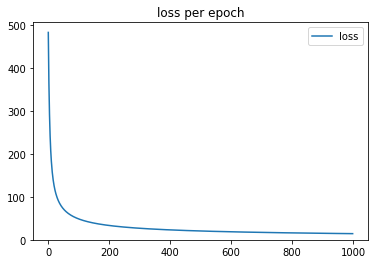

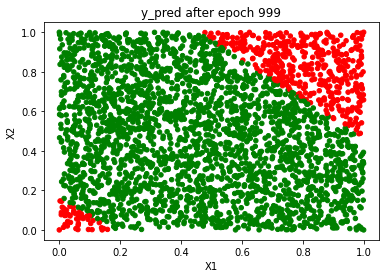

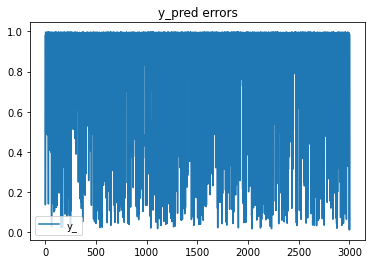

[0 0] -> 0.01203279913248482
[0 1] -> 0.9852662280190283
[1 0] -> 0.9856445068745145
[1 1] -> 0.016116205672691657


In [98]:
bias = 1.
epochs = 1000
lr = 0.75
losses = []

for epoch in range(0,epochs):
    
    loss = 0.
    for sample_idx in range(0,len(X)):

        x = X[sample_idx, :]
        y = Y[sample_idx, :][0]

        x = x.reshape(1,len(x))
        y = y.reshape(1,1)

        # forward
        z1 = np.sum(w1[1:].T * x) + w1[0] #TODO (1 point)
        z1 = z1.reshape(1,len(z1))
        
        a1 = activation_func_mlp(z1) #TODO (1 point)

        z2 = np.sum(w2[1:].T * a1) + w2[0] #TODO (1 point)
        z2 = z2.reshape(1,len(z2))

        a2 = activation_func_mlp(z2) #TODO (1 point)

        # bias trick
        a1 = np.append(bias,a1) #TODO (1 point)
        a1 = a1.reshape(1, len(a1))
        
        loss += rmse_loss(a2,y) #TODO: rmse loss (1 point)


        # back propagation
        delta2 = (a2-y) * (a2 * (1-a2))

        delta1   = np.dot(delta2, w2[1: ].T) * activation_func_mlp_deriv(a1.T[1: ].T) #TODO (1 point)
        delta1_b = np.dot(delta2, w2[0 ].T) * (a1.T[0 ].T * (1-a1.T[0 ].T))

        grad12   = np.dot(a1.T[1:], delta2)
        grad12_b = np.dot(a1.T[0 ], delta2) #TODO (1 point)
        
        # bias trick
        x = np.append(bias, x)
        x = x.reshape(1, len(x))
        
        grad01   =  np.dot(x.T[1: ], delta1) #TODO (1 point)
        grad01_b = np.dot(x.T[0 ], delta1_b)
                
        w2[0]  = w2[0] - lr * grad12_b #TODO (1 point)
        w2[1:] = w2[1:] - lr * grad12


        w1[0]  = w1[0]  - lr * grad01_b
        w1[1:] = w1[1:]  - lr * grad01 #TODO (1 point)
    
    loss = loss.ravel()[0]
    losses.append(loss)
    if epoch % 100 == 0:
        print(f'epoch: {epoch} loss: {loss}')
        
util.test_mlp(w1, w2, losses, f'y_pred after epoch {epoch}')

If you implemented your Multi Layer Perceptron Classifier correctly then the XOR dataset should output predictions close to 1.0 (~ 0.98) in case of X1-X2-combinations (0,1) and (1,0) otherwise the predictions should be close to 0.0 (~ 0.01).

### <font color='#782769'>TODO #5: Implement a Multi Layer Perceptron with torch library.</font>
### <font color='#e52425'>This will be graded. (7 points)</font>

Hint: You can lookup details at https://pytorch.org/docs/stable/optim.html or https://pytorch.org/docs/stable/nn.html

In [99]:
import torch
from torch import nn, optim

class MLPerceptron(nn.Module):
    
    def __init__(self, input_layer_width, hidden_layer_width, output_layer_width, device='cpu'):
        super(MLPerceptron, self).__init__()
        self.device = torch.device(device)
        
        # TODO: define the MLPerceptron architecture with torch linear layer modules and torch sigmoid functions
        
        self.fc_ih = nn.Linear(input_layer_width, hidden_layer_width) #TODO (0.5 point)
        self.act1 = nn.Sigmoid() #TODO (0.5 point)
        self.fc_ho = torch.nn.Linear(hidden_layer_width, output_layer_width) #TODO (0.5 point)
        self.act2 = nn.Sigmoid() #TODO (0.5 point)
            
    def forward(self, x):
    
        # TODO: call the hypothesis functions (layer) and activation functions
        
        z1 = self.fc_ih(x) #TODO (0.5 point)
        a1 = self.act1(z1) #TODO (0.5 point)
        z2 = self.fc_ho(a1) #TODO (0.5 point)
        a2 = self.act2(z2) #TODO (0.5 point)
        
        return a2
    
    def fit(self, X, Y, lr=1e-3, epochs=1000, bs=32):
        self.train()
        
        # TODO: fill the gaps with the missing torch training steps
        
        loss_fn = nn.MSELoss() #TODO torch mse loss (0.5 point)
        optimizer = optim.Adam(self.parameters(), lr=lr)
        
        losses = []
        for epoch in range(0,epochs):
            
            loss_ = 0.
            for batch_index in range(int(X.shape[0]/bs)):
                
                start_idx = batch_index * bs
                end_idx = start_idx + bs
                
                x = torch.tensor(X[start_idx:end_idx, :], device=self.device, dtype=torch.float)
                y = torch.tensor(Y[start_idx:end_idx, :], device=self.device, dtype=torch.float)
                                                
                optimizer.zero_grad() #TODO (0.5 point)
                
                y_pred = self.forward(x) #TODO (0.5 point)
                loss = loss_fn(y_pred, y)
                loss_+= loss.item() #TODO (0.5 point)
                
                loss.backward() #TODO (0.5 point)
                optimizer.step() #TODO (0.5 point)
                
            if epoch % 100 == 0:
                print(f'epoch: {epoch} loss: {loss}')
                
            losses.append(loss_)
            
        pd.DataFrame({'loss': losses}).plot(ylim=0.,title='losses')
        plt.show()
    
    def predict(self, x):
        y_pred = None
        
        self.eval()
        with torch.no_grad():
            y_pred = self.forward(x)
            
        return y_pred

X: (1000, 2)
Y: (1000, 1)
epoch: 0 loss: 0.2360294759273529
epoch: 100 loss: 0.1966676265001297
epoch: 200 loss: 0.06188935786485672
epoch: 300 loss: 0.008282750844955444
epoch: 400 loss: 0.0015595236327499151
epoch: 500 loss: 0.0003465888148639351
epoch: 600 loss: 8.276189328171313e-05
epoch: 700 loss: 2.054265860351734e-05
epoch: 800 loss: 5.228382633504225e-06
epoch: 900 loss: 1.3568236454375437e-06


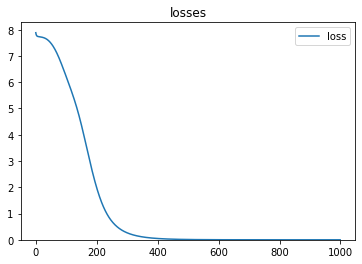

[0 0] -> tensor([0.0007])
[0 1] -> tensor([0.9994])
[1 0] -> tensor([0.9994])
[1 1] -> tensor([0.0004])


In [100]:
dataset = 'XOR'
data = util.load_data()
X = data[dataset]['X']
Y = data[dataset]['Y']
print(f'X: {X.shape}')
print(f'Y: {Y.shape}')

lr=1e-3
epochs=1000

model = MLPerceptron(X.shape[1], 4, Y.shape[1]) # MLPerceptron(2, 4, 1)
model.fit(X, Y, lr, epochs)

ins = np.array([[0,0],[0,1],[1,0],[1,1]])
for input_ in ins:
    x = torch.tensor(input_, device=model.device, dtype=torch.float)
    y_ = model.predict(x)
    print(f'{input_} -> {y_ }')

When you compare the number of lines of code required for implementation and those required for the implementation with PyTorch then you recognize that PyTorch takes over huge parts for you like the bias handling, declaration and initialization of model weights, implementation of the hypothesis and activation functions and also the backpropagation part. If the resulting torch model predicts the correct XOR outputs then you completed this task successfully.

## Part 4 - Graph Convolutional Neural Networks (GCNs)

Since Neural Networks can be applied to nearly every kind of data they are also popular for training classifiers on graph data. In this part you will implement a Graph Convolutional Neural Network with PyTorch and Deep Graph Library. The most common libraries for the implementation of graph neural networks are the Deep Graph Library ( https://www.dgl.ai/ ), PyTorch Geometric ( https://pytorch-geometric.readthedocs.io/en/latest/ ) and Deep Minds Graph Nets ( https://github.com/deepmind/graph_nets ) for TensorFlow. <br><br>This classifier will be trained on the Zachery Karate Club dataset which is represented by a graph. The nodes in the graph represent 34 students (karate club members) and the edges show with which other students/members they interacted. Based on the student interactions and based on the representatives of the two karate clubs (node 0 = club-A-president and node 33 = club-B-instructor) you need to train your GCN in a semi-supervised manner.

### <font color='#782769'>TODO #6: Implement a Graph Neural Network with Deep Graph Library and Torch Library.</font>
### <font color='#e52425'>This will be graded. (7 points)</font>

Like in each part you need to import the required libraries and load the data. This graph dataset has 34 nodes and 156 edges.

In [101]:
import dgl
import numpy as np
import pandas as pd
import networkx as nx
import torch
import torch.nn as nn
import torch.nn.functional as F
from utils import util

G = util.load_graph_data()
print(f'nodes: {G.number_of_nodes()}')
print(f'edges: {G.number_of_edges()}')

nodes: 34
edges: 156


/usr/local/lib/python3.8/site-packages/dgl/base.py:45: DGLWarning: Recommend creating graphs by `dgl.graph(data)` instead of `dgl.DGLGraph(data)`.
  return warnings.warn(message, category=category, stacklevel=1)


Next we plot the graph in order to get a glue how it roughly looks like without any node classifications. When we look to our club representative nodes 0 and node 33 then you might recognize that they are the nodes having the most interactions with their neighborhood nodes.

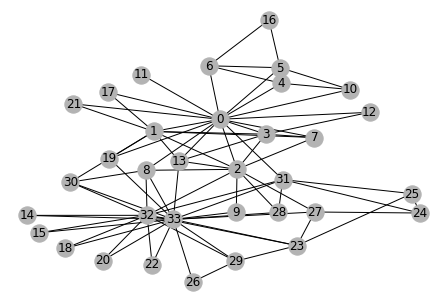

In [102]:
nx_G = G.to_networkx().to_undirected()
pos = nx.kamada_kawai_layout(nx_G)
nx.draw(nx_G, pos, with_labels=True, node_color=[[.7, .7, .7]])

In order to achieve a well classified graph like the following our classifier needs to learn embeddings for each node. The distance of each node embedding to the embedding of the representative nodes of both clubs can decide to which club a node is more likely to belong to.

<img src="images/zachery_karate_ground_truth.jpg">

The inputs x of the GCN are weights from our node embeddings whose initial weight values are randomly sampled from a normal distribution. Based on the negative log likelihood loss distance of each node to its class representative the GCN learns a vector embedding for each node in its hidden layer.

<img src="images/GCNembeddingVectors.jpg">

In [103]:
node_embedding_vector_size = 5
node_embeddings = nn.Embedding(G.number_of_nodes(), node_embedding_vector_size) #TODO: create torch nn.Embedding for nodeEmbeddingVectorMatrix (1 point)

# assign node_embeddings weight matrix as "embedds" feature vector
G.ndata['embedds'] = node_embeddings.weight #TODO (1 point)

In [104]:
# 0 = community A
# 1 = community B
class_labels = torch.tensor([0, 1])

#  0 = representative node of community B
# 33 = representative node of community A
indexes_of_class_representatives = torch.tensor([0, G.nodes().shape[0]-1])  # define a representative node for each class

In [105]:
from dgl.nn.pytorch import GraphConv

def membership_check(node_idx, y_pred_node_membership):
    # Ground Truth Labels for each community to node (student) relationship. -> Found via the original paper
    y_true_node_memberships = np.array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

    community_node_indexes = np.argwhere(y_pred_node_membership == y_true_node_memberships).T.ravel()
    return (node_idx in community_node_indexes)

def test_GNN(G, preds_of_epoch):
    
    num_wrong_classifications = 0
    for node_idx in range(0, len(G.nodes())):

        node_preds = preds_of_epoch[node_idx].numpy()
        predicted_class_idx = node_preds.argmax()

        if not membership_check(node_idx, predicted_class_idx):
            num_wrong_classifications += 1
            
    return num_wrong_classifications

class GCN(nn.Module):
    def __init__(self, input_layer_width, hidden_layer_width, output_layer_width):
        super(GCN, self).__init__()
        
        #TODO: create GCN architecture with 5,5,2 GraphConv layers
        
        self.conv1 = GraphConv(input_layer_width, hidden_layer_width) #TODO (1 point)
        self.conv2 = GraphConv(hidden_layer_width, output_layer_width) #TODO (1 point)

    def forward(self, dgl_graph, x):
        
        z1 = self.conv1(dgl_graph, x)
        a1 = torch.relu(z1)
        z2 = self.conv2(dgl_graph, a1)
        
        return z2

In [106]:
#model= GCN(<in_size>, <hidden_size>, <out_size>)
model = GCN(node_embeddings.weight.shape[1], node_embedding_vector_size, class_labels.shape[0])
model.train()

GCN(
  (conv1): GraphConv(in=5, out=5, normalization=both, activation=None)
  (conv2): GraphConv(in=5, out=2, normalization=both, activation=None)
)

Epoch 0 Loss: 0.6450175046920776
Epoch 10 Loss: 0.44024914503097534
Epoch 20 Loss: 0.2122289091348648
Epoch 30 Loss: 0.06519383192062378
Epoch 40 Loss: 0.017567841336131096


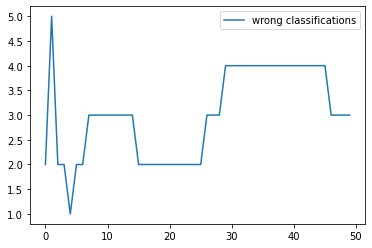

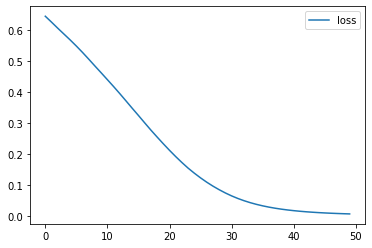

In [107]:
%matplotlib inline
import matplotlib.pyplot as plt
import itertools

lr=0.01   # TODO: find a proper learning rate lr (0.5 points)
epochs=50 # TODO: find a proper number of epochs (0.5 points)

optimizer = torch.optim.Adam(itertools.chain(model.parameters(), node_embeddings.parameters()), lr=lr)

losses = []
predictions = []
wrong_classifications = []
for epoch in range(0, epochs):
    
    inputs = G.ndata['embedds'] #TODO (1 point)
    
    optimizer.zero_grad()
    
    z2 = model.forward(G, inputs)
    preds = z2.detach()
    predictions.append(preds)
    
    # calculate the log softmax probabilities for the output layer classes
    a2 = F.log_softmax(z2, 1) 
    preds_of_class_representatives = a2[indexes_of_class_representatives]
    
    # calculate distance between class label predictions and actual class labels
    # by negative log likelihood loss
    loss = F.nll_loss( preds_of_class_representatives , class_labels)  #TODO (1 point)
    losses.append(loss.item())
    
    loss.backward()
    optimizer.step()
    
    num_wrong_classifications = test_GNN(G, preds)
    wrong_classifications.append(num_wrong_classifications)
    
    if epoch % 10 == 0:
        print(f'Epoch {epoch} Loss: {loss.item()}')

pd.DataFrame({'wrong classifications': wrong_classifications}).plot()
plt.show()     
pd.DataFrame({'loss': losses}).plot()
plt.show()
util.plot_graphs(nx_G, predictions, losses, wrong_classifications)

After you trained your GCN correctly the animated graph should roughly look like the following graph without any misclassified (grey) nodes. In case you have issues reaching this result an adaption of learning rate or epochs could help.<br><br><img src="images/zachery_karate_result.jpg">